# TEST FOR FEATURE RESHAPING

After discussion with Sioni we noticed that the features I am using are defined in very very different ranges. This is not a problem per se for the BDTs but it is a problem when it comes to the fixed point encoding.

This notebook is a test of the various possible reshapings and how they play out.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from IPython.display import HTML
import io
import base64
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 2px;
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

In [2]:
# dictionary of full set of variables used throughout the whoel L1 algorithm

# name : [title, [min, max, step]
features_dict = {'cl3d_pt'            : [r'3D cluster $p_{T}$',[0.,100.,50]],
                 'cl3d_abseta'           : [r'3D cluster |$\eta$|',[1.5,3.,10]], 
                 'cl3d_showerlength'     : [r'3D cluster shower length',[0.,50.,15]], 
                 'cl3d_coreshowerlength' : [r'3D cluster core shower length ',[0.,36.,15]], 
                 'cl3d_firstlayer'       : [r'3D cluster first layer',[0.,20.,20]], 
                 'cl3d_seetot'           : [r'3D cluster total $\sigma_{\eta\eta}$',[0.,0.15,10]],
                 'cl3d_seemax'           : [r'3D cluster max $\sigma_{\eta\eta}$',[0.,0.15,10]],
                 'cl3d_spptot'           : [r'3D cluster total $\sigma_{\phi\phi}$',[0.,0.1,10]],
                 'cl3d_sppmax'           : [r'3D cluster max $\sigma_{\phi\phi}$',[0.,0.1,10]],
                 'cl3d_szz'              : [r'3D cluster $\sigma_{zz}$',[0.,60.,20]], 
                 'cl3d_srrtot'           : [r'3D cluster total $\sigma_{rr}$',[0.,0.01,10]],
                 'cl3d_srrmax'           : [r'3D cluster max $\sigma_{rr}$',[0.,0.01,10]],
                 'cl3d_srrmean'          : [r'3D cluster mean $\sigma_{rr}$',[0.,0.01,10]], 
                 'cl3d_hoe'              : [r'3D cluster energy CE-H / CE-E',[0.,4.,20]], 
                 'cl3d_meanz'            : [r'3D cluster meanz',[325.,375.,30]], 
                 'cl3d_NclIso_dR4'              : [r'Number of clusters inside an isolation cone of dR=0.4',[0.,10.,10]],
                 'cl3d_etIso_dR4'               : [r'Clusters $E_{T}$ inside an isolation cone of dR=0.4',[0.,200.,40]],
                 'tower_etSgn_dRsgn1'           : [r'$E_{T}$ inside a signal cone of dR=0.1',[0.,200.,40]],
                 'tower_etSgn_dRsgn2'           : [r'$E_{T}$ inside a signal cone of dR=0.2',[0.,200.,40]],
                 'tower_etIso_dRsgn1_dRiso3'    : [r'Towers $E_{T}$ between dR=0.1-0.3 around L1 candidate',[0.,200.,40]],
                 'tower_eIso_dRsgn1_dRiso3'     : [r'Towers $E$ between dR=0.1-0.3 around L1 candidate',[0.,400.,40]],
                 'tower_etEmIso_dRsgn1_dRiso3'  : [r'Towers $E_{T}^{em}$ between dR=0.1-0.3 around L1 candidate',[0.,150.,30]],
                 'tower_etHadIso_dRsgn1_dRiso7' : [r'Towers $E_{T}^{had}$ between dR=0.1-0.7 around L1 candidate',[0.,200.,40]],
                 'tower_etIso_dRsgn2_dRiso4'    : [r'Towers $E_{T}$ between dR=0.2-0.4 around L1 candidate',[0.,200.,40]],
                 'tower_etEmIso_dRsgn2_dRiso4'  : [r'Towers $E_{T}^{em}$ between dR=0.2-0.4 around L1 candidate',[0.,150.,30]],
                 'tower_etHadIso_dRsgn2_dRiso7' : [r'Towers $E_{T}^{had}$ between dR=0.2-0.7 around L1 candidate',[0.,200.,40]]
}

## ----- PU rejection features -----

In [3]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/matched'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_matched.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_matched.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfPUTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfPUVal = store_tr[name]
store_tr.close()

dfPU = pd.concat([dfPUTr, dfPUVal], sort=False)

featuresPU = ['cl3d_abseta', 'cl3d_showerlength', 'cl3d_coreshowerlength', 'cl3d_firstlayer', 'cl3d_seetot', 
            'cl3d_seemax', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean', 
            'cl3d_hoe', 'cl3d_meanz']

In [4]:
tab = pd.DataFrame(columns=['feature', 'range', 'min', 'max'],index=range(len(featuresPU)))
for i in range(len(featuresPU)):
    feat = featuresPU[i]
    tab['feature'][i] = feat
    tab['range'][i] = dfPU[feat].max()-dfPU[feat].min()
    tab['min'][i] = dfPU[feat].min()
    tab['max'][i] = dfPU[feat].max()
    
tab

,feature,range,min,max
0,cl3d_abseta,1.68965,1.47391,3.16355
1,cl3d_showerlength,49,1,50
2,cl3d_coreshowerlength,35,1,36
3,cl3d_firstlayer,41,1,42
4,cl3d_seetot,0.11222,0,0.11222
5,cl3d_seemax,0.400574,0,0.400574
6,cl3d_spptot,0.11064,0,0.11064
7,cl3d_sppmax,0.350736,0,0.350736
8,cl3d_szz,94.0598,0,94.0598
9,cl3d_srrtot,0.0137052,0,0.0137052


In [5]:
dfQCD_PU = dfPU.query('gentau_decayMode==-2 and cl3d_isbestmatch==True').copy(deep=True)
dfTau_PU = dfPU.query('sgnId==1').copy(deep=True)
dfNu_PU  = dfPU.query('geom_match==False').copy(deep=True)


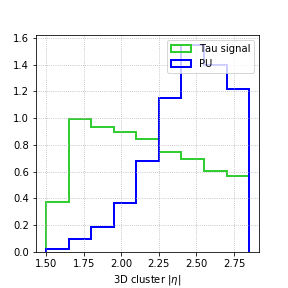
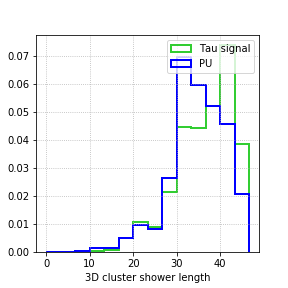
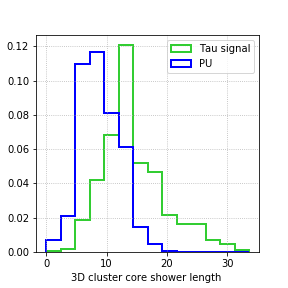
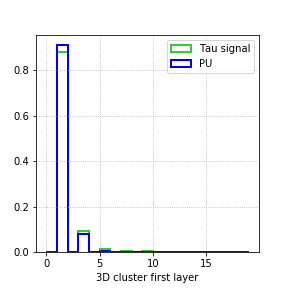
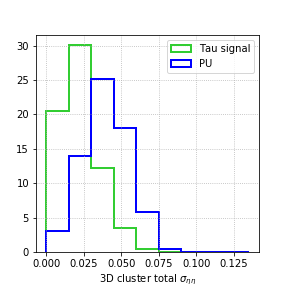
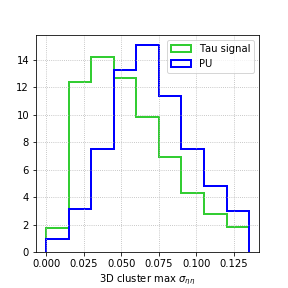
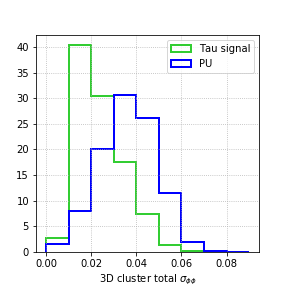
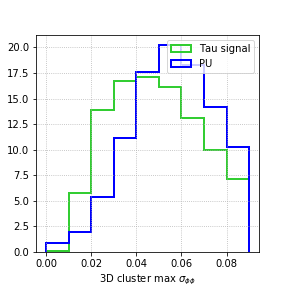
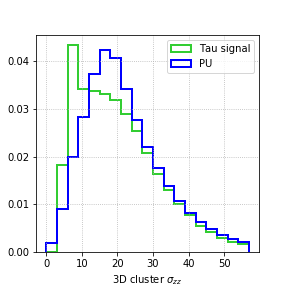
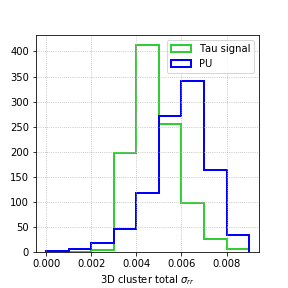
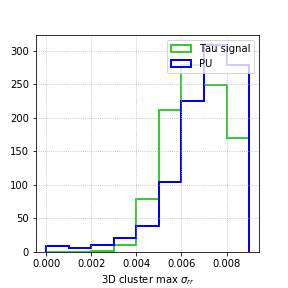
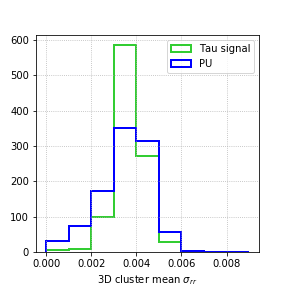
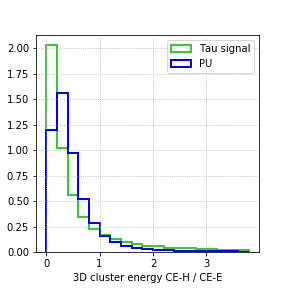
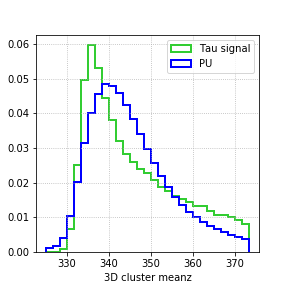

In [6]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresPU)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    #ax.hist(dfQCD_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(dfTau_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(dfNu_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(features_dict[featuresPU[i]][0])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

### Inspect PU features to decide how to saturate them

Here actually no saturation is needed because these features are essentially bounded by definition. Here though we need to define teh max and min value of the variabels to be injected for the training of the `MinMaxScaler`. 


A decision based on the 'definition' of the variable is choosen: the lower bound is always 0, the higher bound is defined as x1.5 the the max value of the features from the simulation.

This aproach is used for variables for which it makes sense (cf. inline comments).

For `hoe` the approach of ISO is used and the upper bound is chosen as the threshold for which 99.5% of taus lay below it.

The features that are defined on the number fo layers of HGCAL are just shifted by half of the number of layers to make them included in the [-32,32] range then used with `MinMaxScaler`

In [7]:
featuresPU2shift = ['cl3d_showerlength', 'cl3d_coreshowerlength', 'cl3d_firstlayer',]

featuresPU2saturate = ['cl3d_abseta', 'cl3d_seetot', 'cl3d_seemax', 'cl3d_spptot', 'cl3d_sppmax', 'cl3d_szz', 
                       'cl3d_srrtot', 'cl3d_srrmax', 'cl3d_srrmean', 'cl3d_hoe', 'cl3d_meanz']

PUsaturation_dict = {
    'cl3d_abseta' : [1.45, 3.2], # by construction of HGCAL
    'cl3d_seetot' : [0, round(dfPU['cl3d_seetot'].max()*1.5,2)],
    'cl3d_seemax' : [0, round(dfPU['cl3d_seemax'].max()*1.5,2)],
    'cl3d_spptot' : [0, round(dfPU['cl3d_spptot'].max()*1.5,2)],
    'cl3d_sppmax' : [0, round(dfPU['cl3d_sppmax'].max()*1.5,2)],
    'cl3d_szz'    : [0, round(dfPU['cl3d_szz'].max()*1.5,2)], 
    'cl3d_srrtot' : [0, round(dfPU['cl3d_srrtot'].max()*1.5,2)],
    'cl3d_srrmax' : [0, round(dfPU['cl3d_srrmax'].max()*1.5,2)],
    'cl3d_srrmean': [0, round(dfPU['cl3d_srrmean'].max()*1.5,2)],
    'cl3d_hoe'    : [0, 9999],
    'cl3d_meanz'  : [int(dfPU['cl3d_meanz'].min()*0.95), int(dfPU['cl3d_meanz'].max()*1.05)] # enlarge simulated range by 5% per side
}

tot = dfTau_PU.shape[0]
for thr in range(int(dfTau_PU['cl3d_hoe'].min()), int(dfTau_PU['cl3d_hoe'].max())+1):
        #print(feat, thr)
        if dfTau_PU.query('cl3d_hoe<={0}'.format(thr)).shape[0]/tot >= 0.995:
            PUsaturation_dict['cl3d_hoe'][1] = thr
            break
            
PUsaturation_dict

{'cl3d_abseta': [1.45, 3.2],
 'cl3d_seetot': [0, 0.17],
 'cl3d_seemax': [0, 0.6],
 'cl3d_spptot': [0, 0.17],
 'cl3d_sppmax': [0, 0.53],
 'cl3d_szz': [0, 141.09],
 'cl3d_srrtot': [0, 0.02],
 'cl3d_srrmax': [0, 0.02],
 'cl3d_srrmean': [0, 0.01],
 'cl3d_hoe': [0, 63],
 'cl3d_meanz': [305, 535]}

### QuantileTransformer

RESHAPING METHOD DISCARDED

In [8]:
from sklearn.preprocessing import QuantileTransformer

In [9]:
qtPU = QuantileTransformer(output_distribution='normal', random_state=1986)
qtPU.fit(dfPU[featuresPU])

QuantileTransformer(output_distribution='normal', random_state=1986)

In [10]:
transformedQCD_PU = pd.DataFrame(qtPU.transform(dfQCD_PU[featuresPU]), columns=featuresPU)
transformedTau_PU = pd.DataFrame(qtPU.transform(dfTau_PU[featuresPU]), columns=featuresPU)
transformedNu_PU = pd.DataFrame(qtPU.transform(dfNu_PU[featuresPU]), columns=featuresPU)

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges



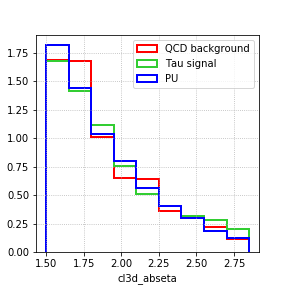
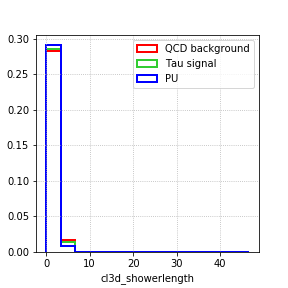
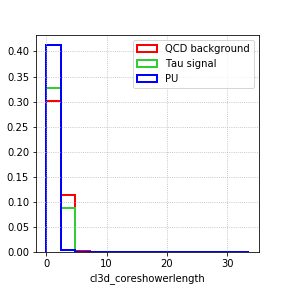
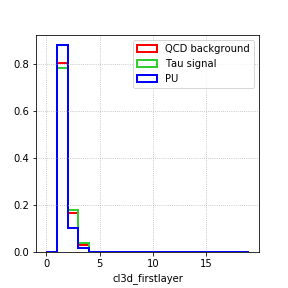
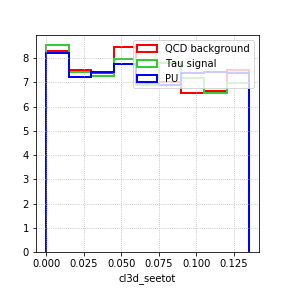
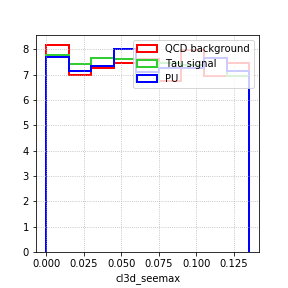
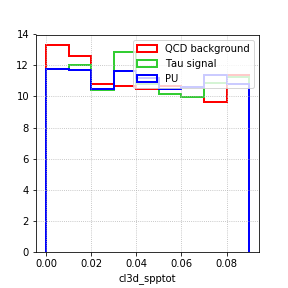
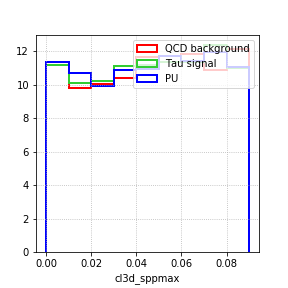
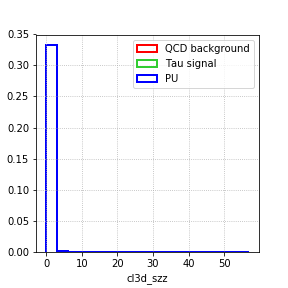
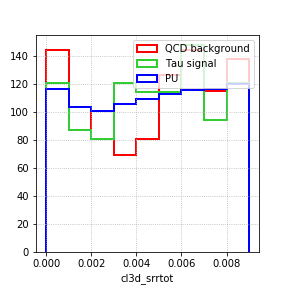
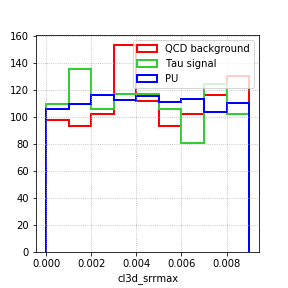
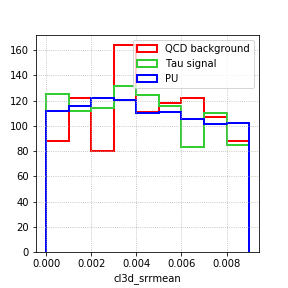
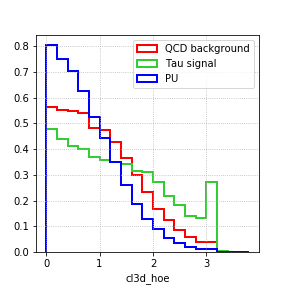
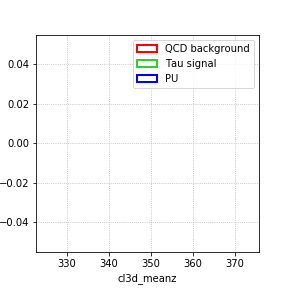

In [11]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresPU)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(transformedQCD_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(transformedNu_PU[featuresPU[i]], bins=np.arange(features_dict[featuresPU[i]][1][0],features_dict[featuresPU[i]][1][1],(features_dict[featuresPU[i]][1][1]-features_dict[featuresPU[i]][1][0])/features_dict[featuresPU[i]][1][2]), label='PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresPU[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

### MinMaxScaler

RESHAPING METHOD DISCARDED IF DONE ON ITS OWN --> NEED FEATURES BOUNDING

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scale_range = [0,36]
min_max_scalerPU = MinMaxScaler(scale_range)

In [14]:
transformedQCD_PU2 = pd.DataFrame(min_max_scalerPU.fit_transform(dfQCD_PU[featuresPU], True), columns=featuresPU)
transformedTau_PU2 = pd.DataFrame(min_max_scalerPU.fit_transform(dfTau_PU[featuresPU], True), columns=featuresPU)
transformedNu_PU2 = pd.DataFrame(min_max_scalerPU.fit_transform(dfNu_PU[featuresPU], True), columns=featuresPU)


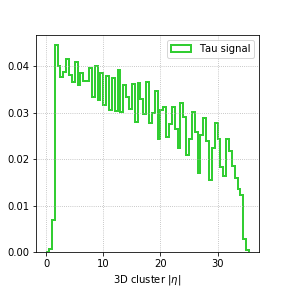
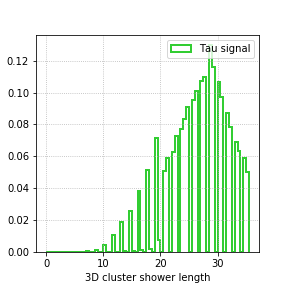
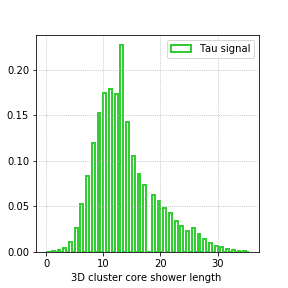
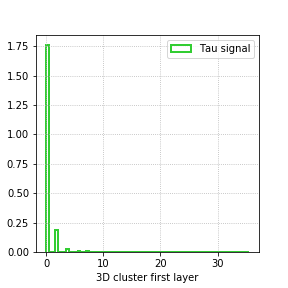
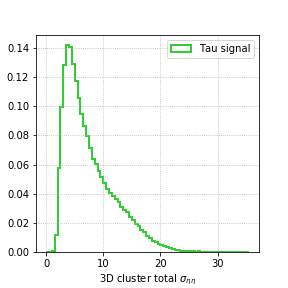
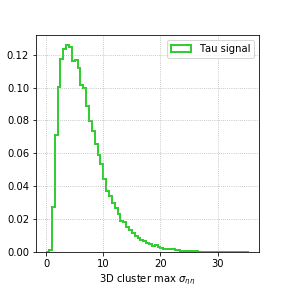
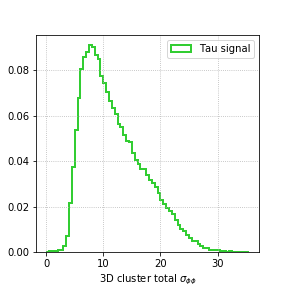
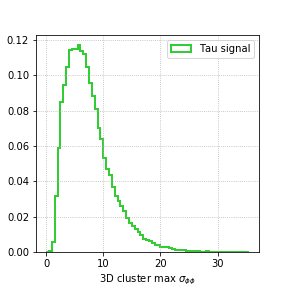
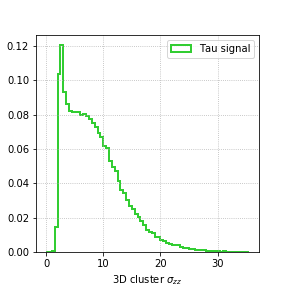
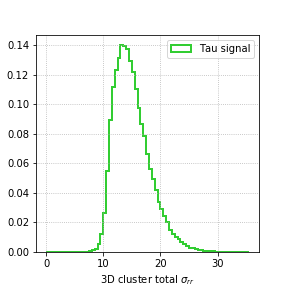
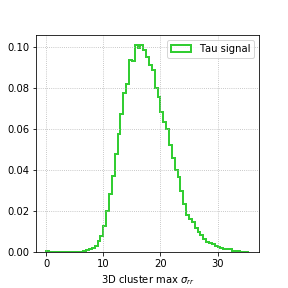
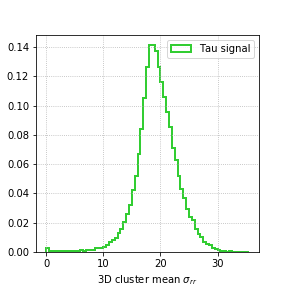
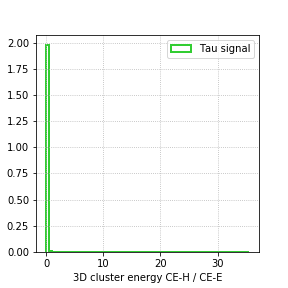
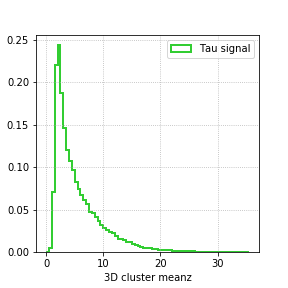

In [15]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresPU)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    #ax.hist(transformedQCD_PU2[featuresPU[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_PU2[featuresPU[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    #ax.hist(transformedNu_PU2[featuresPU[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(features_dict[featuresPU[i]][0])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

## HAVE STARTING VARIABLE RANGE ARTIFICIALLY BOUNDED

This test is to try to add an artificial maximum value to the original variables tat then need to be reshaped. This should make the MaxMinScaler always applicable even if the actual variables ranges are not fixed event by event.

This idea comes from te fact that the MinMaxScaler trasnformation output depends on the input we give it, i.e. depending on the min/max in this way: 
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# saturate features so that MinMaxSacler has a bound region to act on
dfQCD_PU_mod = dfQCD_PU[featuresPU].copy(deep=True)
dfTau_PU_mod = dfTau_PU[featuresPU].copy(deep=True)
dfNu_PU_mod = dfNu_PU[featuresPU].copy(deep=True)

for feat in featuresPU2saturate:
    dfQCD_PU_mod[feat].clip(PUsaturation_dict[feat][0],PUsaturation_dict[feat][1], inplace=True)
    dfTau_PU_mod[feat].clip(PUsaturation_dict[feat][0],PUsaturation_dict[feat][1], inplace=True)
    dfNu_PU_mod[feat].clip(PUsaturation_dict[feat][0],PUsaturation_dict[feat][1], inplace=True)
    
for feat in featuresPU2shift:
    dfQCD_PU_mod[feat] = dfQCD_PU_mod[feat] - 25
    dfTau_PU_mod[feat] = dfTau_PU_mod[feat] - 25
    dfNu_PU_mod[feat] = dfNu_PU_mod[feat] - 25

In [18]:
#define a DF with the bound values of the features to use for the MinMaxScaler 
boundFeatures = pd.DataFrame(columns=featuresPU2saturate)
for feat in featuresPU2saturate:
    boundFeatures[feat] = np.linspace(PUsaturation_dict[feat][0],PUsaturation_dict[feat][1],100)

In [19]:
scale_range = [-32,32]
bounMMS_PU = MinMaxScaler(scale_range)

In [20]:
bounMMS_PU.fit(boundFeatures[featuresPU2saturate])

MinMaxScaler(feature_range=[-32, 32])

In [21]:
transformedQCD_PU_boundMMS = pd.DataFrame(bounMMS_PU.transform(dfQCD_PU_mod[featuresPU2saturate]), columns=featuresPU2saturate)
transformedTau_PU_boundMMS = pd.DataFrame(bounMMS_PU.transform(dfTau_PU_mod[featuresPU2saturate]), columns=featuresPU2saturate)
transformedNu_PU_boundMMS = pd.DataFrame(bounMMS_PU.transform(dfNu_PU_mod[featuresPU2saturate]), columns=featuresPU2saturate)


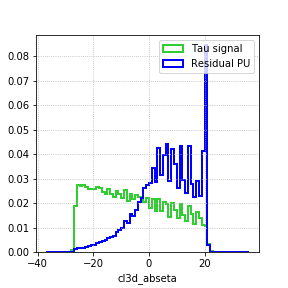
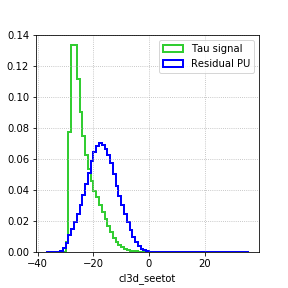
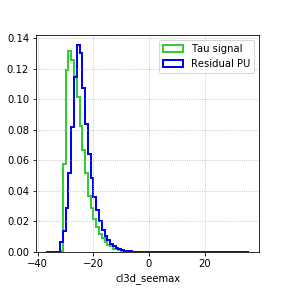
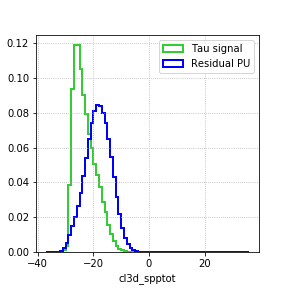
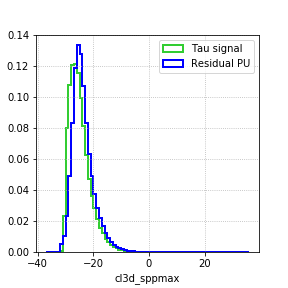
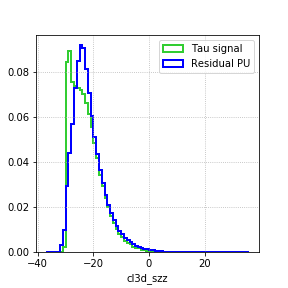
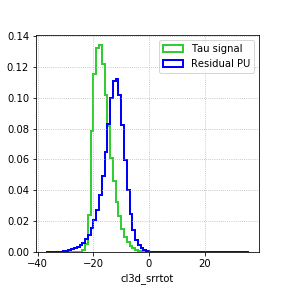
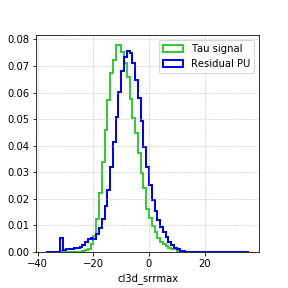
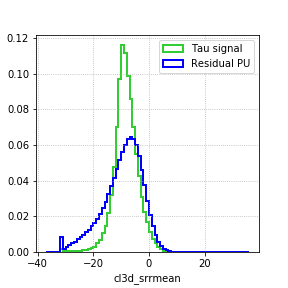
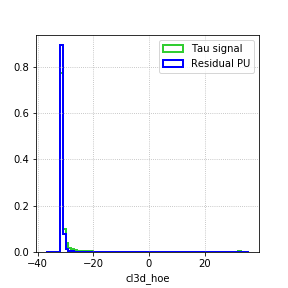
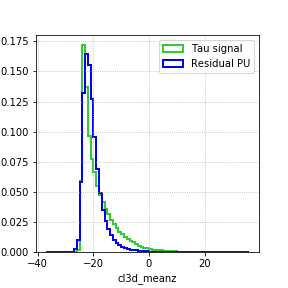

In [22]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresPU2saturate)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    #ax.hist(transformedQCD_PU_boundMMS[featuresPU2saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_PU_boundMMS[featuresPU2saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(transformedNu_PU_boundMMS[featuresPU2saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresPU2saturate[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()


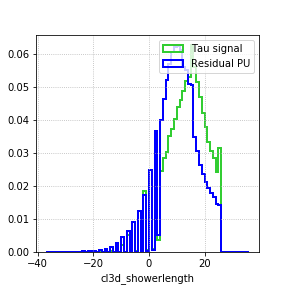
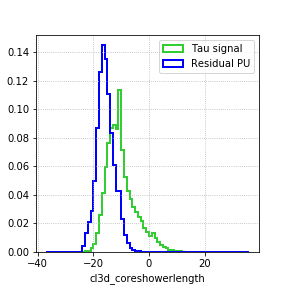
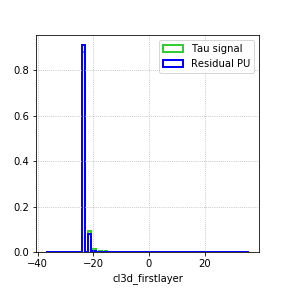

In [23]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresPU2shift)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    #ax.hist(dfQCD_PU_mod[featuresPU2shift[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(dfTau_PU_mod[featuresPU2shift[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    ax.hist(dfNu_PU_mod[featuresPU2shift[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresPU2shift[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

## ----- QCD ISO rejection features -----

In [24]:
indir = '/home/llr/cms/motta/HGCAL/CMSSW_11_1_0/src/GRAPHAnalysis/L1BDT/hdf5dataframes/isolated_fullPUnoPt'

name = 'threshold'
    
# define the input and output dictionaries for the handling of different datasets
inFileTraining_dict = {
    'threshold'    : indir+'/Training_PU200_th_isoCalculated.hdf5',
    'mixed'        : indir+'/'
}
inFileValidation_dict = {
    'threshold'    : indir+'/Validation_PU200_th_isoCalculated.hdf5',
    'mixed'        : indir+'/'
}

store_tr = pd.HDFStore(inFileTraining_dict[name], mode='r')
dfISOTr = store_tr[name]
store_tr.close()

store_tr = pd.HDFStore(inFileValidation_dict[name], mode='r')
dfISOVal = store_tr[name]
store_tr.close()

dfISO = pd.concat([dfISOTr, dfISOVal], sort=False)

featuresISO = ['cl3d_pt', 'cl3d_NclIso_dR4', 'cl3d_etIso_dR4', 'tower_etSgn_dRsgn1', 
            'tower_etSgn_dRsgn2', 'tower_etIso_dRsgn1_dRiso3', 
            'tower_etEmIso_dRsgn1_dRiso3', 'tower_etHadIso_dRsgn1_dRiso7', 
            'tower_etIso_dRsgn2_dRiso4', 'tower_etEmIso_dRsgn2_dRiso4', 
            'tower_etHadIso_dRsgn2_dRiso7']

In [25]:
tab = pd.DataFrame(columns=['feature', 'range', 'min', 'max'],index=range(len(featuresISO)))
for i in range(len(featuresISO)):
    feat = featuresISO[i]
    tab['feature'][i] = feat
    tab['range'][i] = dfISO[feat].max()-dfISO[feat].min()
    tab['min'][i] = dfISO[feat].min()
    tab['max'][i] = dfISO[feat].max()
    
tab

,feature,range,min,max
0,cl3d_pt,495.778,4.00265,499.78
1,cl3d_NclIso_dR4,38,0,38
2,cl3d_etIso_dR4,925.618,0,925.618
3,tower_etSgn_dRsgn1,539.903,0,539.903
4,tower_etSgn_dRsgn2,641.164,5.84052,647.004
5,tower_etIso_dRsgn1_dRiso3,1068.6,13.682,1082.28
6,tower_etEmIso_dRsgn1_dRiso3,699.091,9.68571,708.777
7,tower_etHadIso_dRsgn1_dRiso7,435.188,0.441447,435.629
8,tower_etIso_dRsgn2_dRiso4,1098.29,18.4017,1116.7
9,tower_etEmIso_dRsgn2_dRiso4,711.926,13.322,725.248


In [26]:
dfQCD_ISO = dfISO.query('gentau_decayMode==-2 and cl3d_isbestmatch==True')
dfTau_ISO = dfISO.query('sgnId==1')
dfNu_ISO  = dfISO.query('geom_match==False')


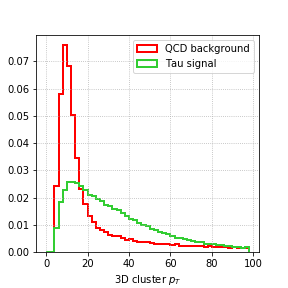
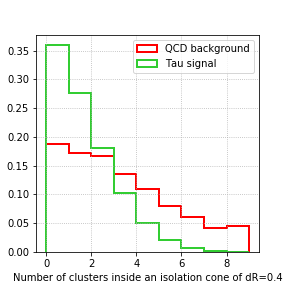
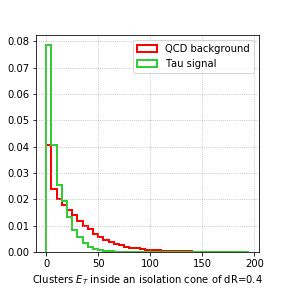
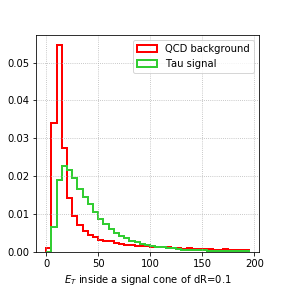
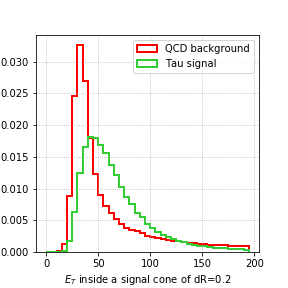
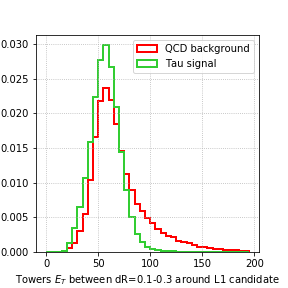
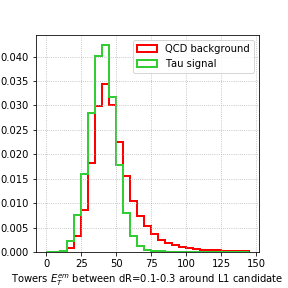
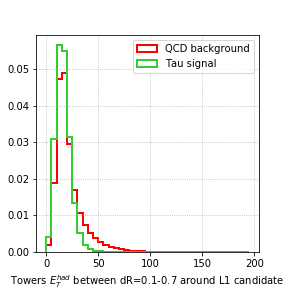
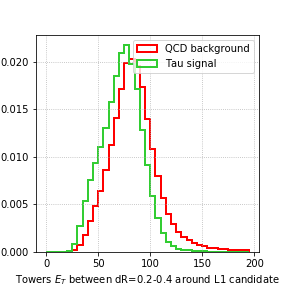
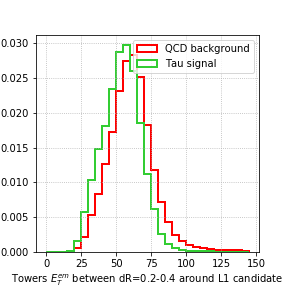
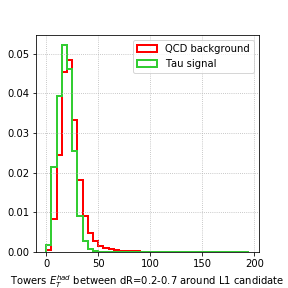

In [27]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresISO)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(dfQCD_ISO[featuresISO[i]], bins=np.arange(features_dict[featuresISO[i]][1][0],features_dict[featuresISO[i]][1][1],(features_dict[featuresISO[i]][1][1]-features_dict[featuresISO[i]][1][0])/features_dict[featuresISO[i]][1][2]), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(dfTau_ISO[featuresISO[i]], bins=np.arange(features_dict[featuresISO[i]][1][0],features_dict[featuresISO[i]][1][1],(features_dict[featuresISO[i]][1][1]-features_dict[featuresISO[i]][1][0])/features_dict[featuresISO[i]][1][2]), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    #ax.hist(dfNu_ISO[featuresISO[i]], bins=np.arange(features_dict[featuresISO[i]][1][0],features_dict[featuresISO[i]][1][1],(features_dict[featuresISO[i]][1][1]-features_dict[featuresISO[i]][1][0])/features_dict[featuresISO[i]][1][2]), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(features_dict[featuresISO[i]][0])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

### Inspect ISO features to decide how to saturate them

The choise of the saturation threshold is the following:
for each variable a threshold is chosen as the value at for which 99.5% of the simulated taus lay below it.

This choice of 99.5% is completely arbitrary but it is driven by the fact that we would like not to kill the efficiency just by saturating the variables too early.

In [28]:
featuresISO2shift = ['cl3d_NclIso_dR4']

featuresISO2Saturate = ['cl3d_etIso_dR4', 'tower_etSgn_dRsgn1', 
            'tower_etSgn_dRsgn2', 'tower_etIso_dRsgn1_dRiso3', 
            'tower_etEmIso_dRsgn1_dRiso3', 'tower_etHadIso_dRsgn1_dRiso7', 
            'tower_etIso_dRsgn2_dRiso4', 'tower_etEmIso_dRsgn2_dRiso4', 
            'tower_etHadIso_dRsgn2_dRiso7']

saturation_dict = {
    'cl3d_etIso_dR4': [0, 9999],
    'tower_etSgn_dRsgn1': [0, 9999],
    'tower_etSgn_dRsgn2': [0, 9999],
    'tower_etIso_dRsgn1_dRiso3': [0, 9999],
    'tower_etEmIso_dRsgn1_dRiso3': [0, 9999],
    'tower_etHadIso_dRsgn1_dRiso7': [0, 9999],
    'tower_etIso_dRsgn2_dRiso4': [0, 9999],
    'tower_etEmIso_dRsgn2_dRiso4': [0, 9999],
    'tower_etHadIso_dRsgn2_dRiso7': [0, 9999]
}

In [29]:
tot = dfTau_ISO.shape[0]
for i in range(len(featuresISO2Saturate)):
    feat = featuresISO2Saturate[i]
    for thr in range(int(dfTau_ISO[feat].min()), int(dfTau_ISO[feat].max())+1):
        #print(feat, thr)
        if dfTau_ISO.query('{0}<={1}'.format(feat,thr)).shape[0]/tot >= 0.995:
            saturation_dict[feat][1] = thr
            break

saturation_dict

{'cl3d_etIso_dR4': [0, 58],
 'tower_etSgn_dRsgn1': [0, 194],
 'tower_etSgn_dRsgn2': [0, 228],
 'tower_etIso_dRsgn1_dRiso3': [0, 105],
 'tower_etEmIso_dRsgn1_dRiso3': [0, 72],
 'tower_etHadIso_dRsgn1_dRiso7': [0, 43],
 'tower_etIso_dRsgn2_dRiso4': [0, 129],
 'tower_etEmIso_dRsgn2_dRiso4': [0, 95],
 'tower_etHadIso_dRsgn2_dRiso7': [0, 42]}

### QuantileTransformer

RESHAPING METHOD DISCARDED

In [30]:
from sklearn.preprocessing import QuantileTransformer

In [31]:
qtISO = QuantileTransformer(output_distribution='normal', random_state=1986)
qtISO.fit(dfISO[featuresISO])

QuantileTransformer(output_distribution='normal', random_state=1986)

In [32]:
transformedQCD_ISO = pd.DataFrame(qtISO.transform(dfQCD_ISO[featuresISO]), columns=featuresISO)
transformedTau_ISO = pd.DataFrame(qtISO.transform(dfTau_ISO[featuresISO]), columns=featuresISO)
transformedNu_ISO = pd.DataFrame(qtISO.transform(dfNu_ISO[featuresISO]), columns=featuresISO)


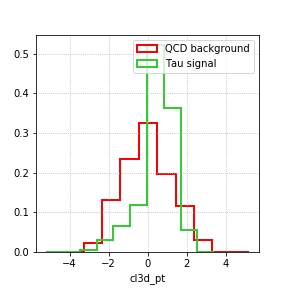
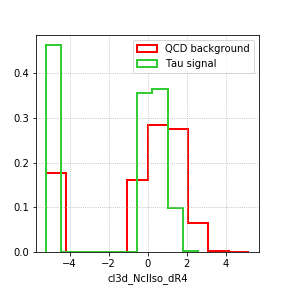
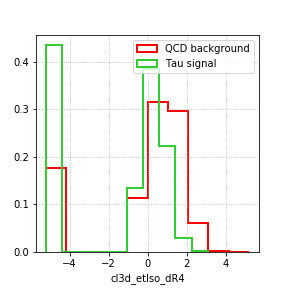
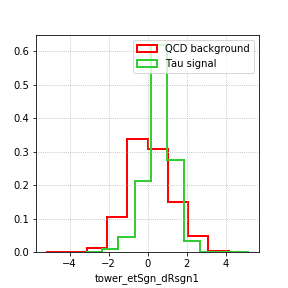
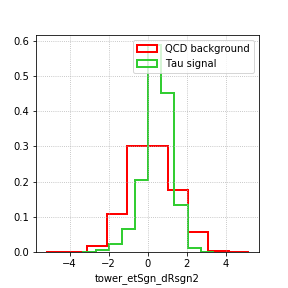
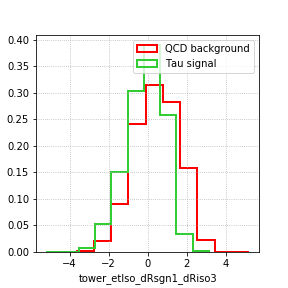
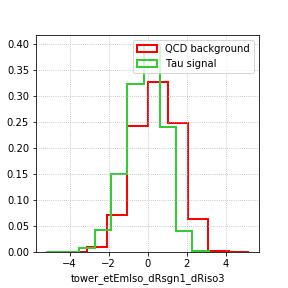
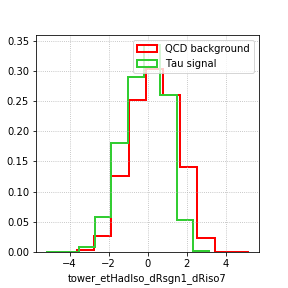
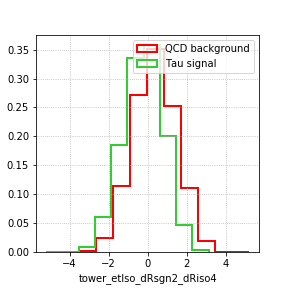
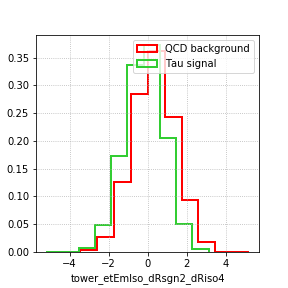
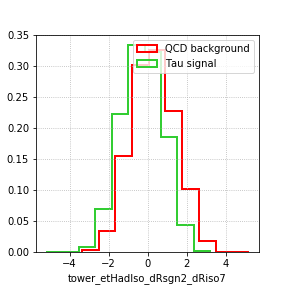

In [33]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresISO)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(transformedQCD_ISO[featuresISO[i]], label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_ISO[featuresISO[i]], label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    #ax.hist(transformedNu_ISO[featuresISO[i]], label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresISO[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

In [34]:
tab = pd.DataFrame(columns=['feature', 'range', 'min', 'max'],index=range(len(featuresISO)))
for i in range(len(featuresISO)):
    feat = featuresISO[i]
    tab['feature'][i] = feat
    tab['range'][i] = transformedQCD_ISO[feat].max()-transformedQCD_ISO[feat].min()
    tab['min'][i] = transformedQCD_ISO[feat].min()
    tab['max'][i] = transformedQCD_ISO[feat].max()
    
tab

,feature,range,min,max
0,cl3d_pt,9.41788,-4.21854,5.19934
1,cl3d_NclIso_dR4,10.3987,-5.19934,5.19934
2,cl3d_etIso_dR4,10.3987,-5.19934,5.19934
3,tower_etSgn_dRsgn1,10.3987,-5.19934,5.19934
4,tower_etSgn_dRsgn2,10.3987,-5.19934,5.19934
5,tower_etIso_dRsgn1_dRiso3,8.83092,-3.63158,5.19934
6,tower_etEmIso_dRsgn1_dRiso3,10.3987,-5.19934,5.19934
7,tower_etHadIso_dRsgn1_dRiso7,8.82087,-3.62154,5.19934
8,tower_etIso_dRsgn2_dRiso4,8.73803,-3.53869,5.19934
9,tower_etEmIso_dRsgn2_dRiso4,8.65498,-3.45564,5.19934


### MinMaxScaler

RESHAPING METHOD DISCARDED IF DONE N ITS OWN --> NEED FEATURES BOUNDING

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scale_range = [0,36]
min_max_scalerISO = MinMaxScaler(scale_range)

In [37]:
transformedQCD_ISO2 = pd.DataFrame(min_max_scalerISO.fit_transform(dfQCD_ISO[featuresISO], True), columns=featuresISO)
transformedTau_ISO2 = pd.DataFrame(min_max_scalerISO.fit_transform(dfTau_ISO[featuresISO], True), columns=featuresISO)
transformedNu_ISO2 = pd.DataFrame(min_max_scalerISO.fit_transform(dfNu_ISO[featuresISO], True), columns=featuresISO)


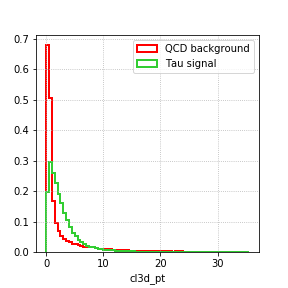
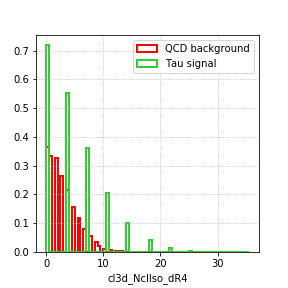
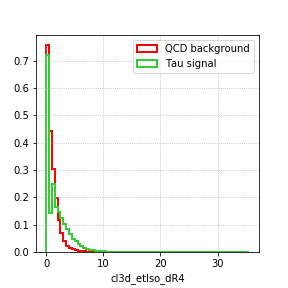
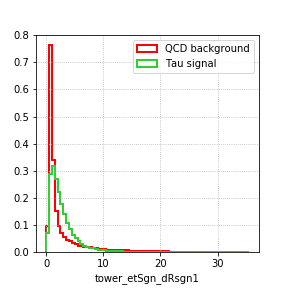
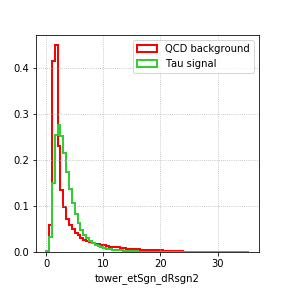
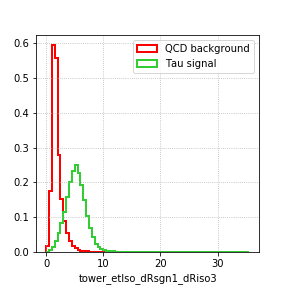
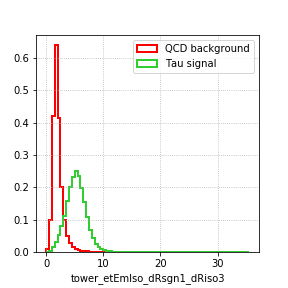
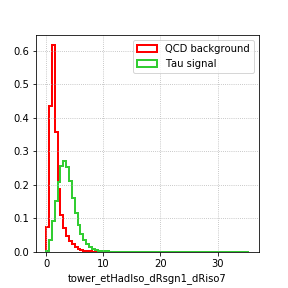
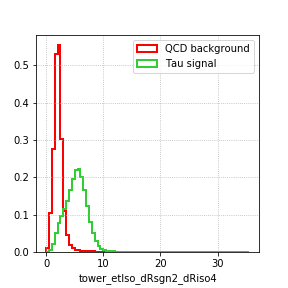
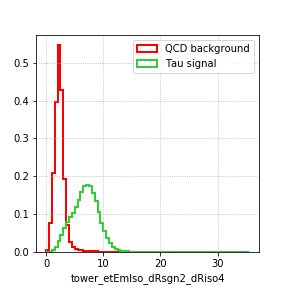
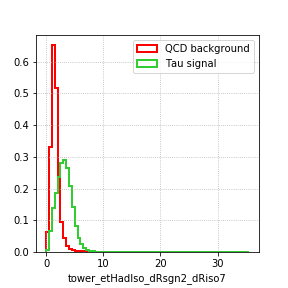

In [38]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresISO)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(transformedQCD_ISO2[featuresISO[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_ISO2[featuresISO[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    #ax.hist(transformedNu_ISO2[featuresISO[i]], bins=np.arange(scale_range[0],scale_range[1],0.5), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresISO[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

## HAVE STARTING VARIABLE RANGE ARTIFICIALLY BOUNDED

This test is to try to add an artificial maximum value to the original variables tat then need to be reshaped. This should make the MaxMinScaler always applicable even if the actual variables ranges are not fixed event by event.

This idea comes from te fact that the MinMaxScaler trasnformation output depends on the input we give it, i.e. depending on the min/max in this way: 
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
# saturate features so that MinMaxSacler has a bound region to act on
dfQCD_ISO_mod = dfQCD_ISO[featuresISO].copy(deep=True)
dfTau_ISO_mod = dfTau_ISO[featuresISO].copy(deep=True)
dfNu_ISO_mod = dfNu_ISO[featuresISO].copy(deep=True)

for feat in featuresISO2Saturate:
    dfQCD_ISO_mod[feat].clip(saturation_dict[feat][0],saturation_dict[feat][1], inplace=True)
    dfTau_ISO_mod[feat].clip(saturation_dict[feat][0],saturation_dict[feat][1], inplace=True)
    dfNu_ISO_mod[feat].clip(saturation_dict[feat][0],saturation_dict[feat][1], inplace=True)
    
# shift by 32 so that we can allow up to 64 clusters in the isolation cone
dfQCD_ISO_mod['cl3d_NclIso_dR4'] = dfQCD_ISO_mod['cl3d_NclIso_dR4'] - 32
dfTau_ISO_mod['cl3d_NclIso_dR4'] = dfTau_ISO_mod['cl3d_NclIso_dR4'] - 32
dfNu_ISO_mod['cl3d_NclIso_dR4'] = dfNu_ISO_mod['cl3d_NclIso_dR4'] - 32

In [41]:
#define a DF with the bound values of the features to use for the MinMaxScaler 
boundFeatures = pd.DataFrame(columns=featuresISO2Saturate)
for feat in featuresISO2Saturate:
    boundFeatures[feat] = np.linspace(saturation_dict[feat][0],saturation_dict[feat][1],100)

In [42]:
scale_range = [-32,32]
bounMMS_ISO = MinMaxScaler(scale_range)

In [43]:
bounMMS_ISO.fit(boundFeatures[featuresISO2Saturate])

MinMaxScaler(feature_range=[-32, 32])

In [44]:
transformedQCD_ISO_boundMMS = pd.DataFrame(bounMMS_ISO.transform(dfQCD_ISO_mod[featuresISO2Saturate]), columns=featuresISO2Saturate)
transformedTau_ISO_boundMMS = pd.DataFrame(bounMMS_ISO.transform(dfTau_ISO_mod[featuresISO2Saturate]), columns=featuresISO2Saturate)
transformedNu_ISO_boundMMS = pd.DataFrame(bounMMS_ISO.transform(dfNu_ISO_mod[featuresISO2Saturate]), columns=featuresISO2Saturate)


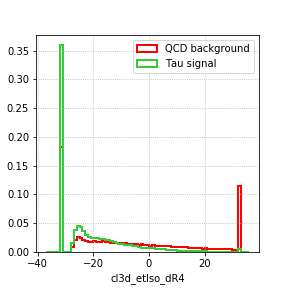
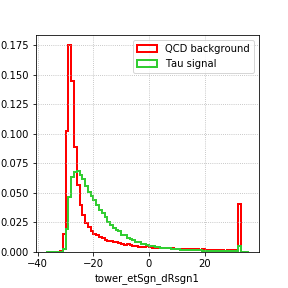
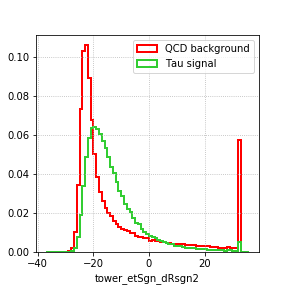
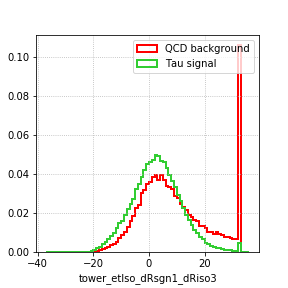
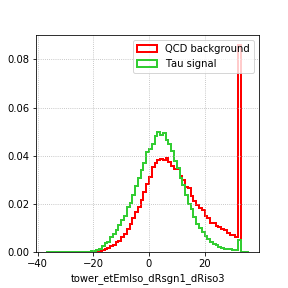
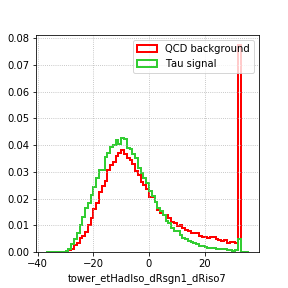
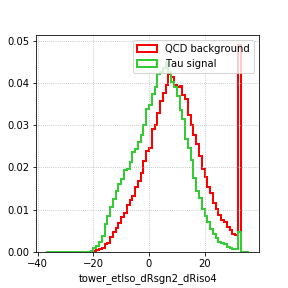
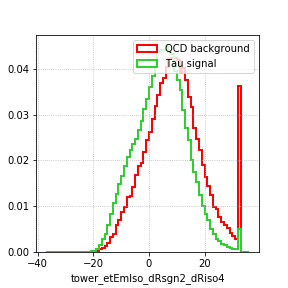
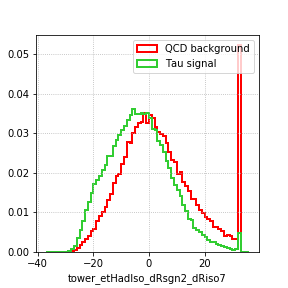

In [45]:
oPlot = FlowLayout() # create an empty FlowLayout

for i in range(len(featuresISO2Saturate)):
    fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots
    
    # make your plot here
    ax.hist(transformedQCD_ISO_boundMMS[featuresISO2Saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
    ax.hist(transformedTau_ISO_boundMMS[featuresISO2Saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
    #ax.hist(transformedNu_ISO_boundMMS[featuresISO2Saturate[i]], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
    ax.legend(loc = 'upper right')
    ax.grid(linestyle=':')
    ax.set_xlabel(featuresISO2Saturate[i])
    
    oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
    plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()


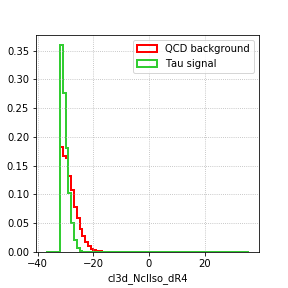

In [46]:
oPlot = FlowLayout() # create an empty FlowLayout

fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots

# make your plot here
ax.hist(dfQCD_ISO_mod['cl3d_NclIso_dR4'], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau_ISO_mod['cl3d_NclIso_dR4'], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
#ax.hist(dfNu_ISO_mod['cl3d_NclIso_dR4'], bins=np.arange(scale_range[0]-5,scale_range[1]+5,1), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('cl3d_NclIso_dR4')

oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

## ----- PT saturation tests -----


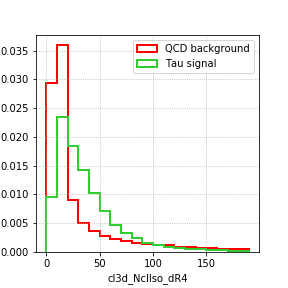

In [176]:
oPlot = FlowLayout() # create an empty FlowLayout

fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots

# make your plot here
ax.hist(dfQCD_ISO['cl3d_pt'], bins=np.arange(0,200,10), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau_ISO['cl3d_pt'], bins=np.arange(0,200,10), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
#ax.hist(dfNu_ISO['cl3d_pt'], bins=np.arange(0,200,10), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('cl3d_NclIso_dR4')

oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()

In [177]:
dfQCD_ISO_ptMod = dfQCD_ISO.copy(deep=True)
dfTau_ISO_ptMod = dfTau_ISO.copy(deep=True)
dfNu_ISO_ptMod = dfNu_ISO.copy(deep=True)

In [178]:
tot = dfTau_ISO_ptMod.shape[0]
for thr in range(int(dfTau_ISO['cl3d_pt'].min()), int(dfTau_ISO['cl3d_pt'].max())+1):
    if dfTau_ISO.query('cl3d_pt<={0}'.format(thr)).shape[0]/tot >= 0.9968:
        print(thr)
        break

200


In [179]:
dfQCD_ISO_ptMod['cl3d_pt'].clip(0,200, inplace=True)
dfTau_ISO_ptMod['cl3d_pt'].clip(0,200, inplace=True)
dfNu_ISO_ptMod['cl3d_pt'].clip(0,200, inplace=True)


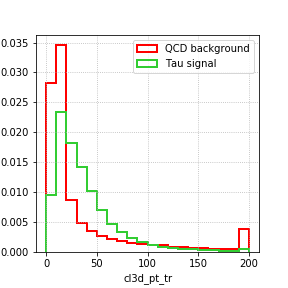

In [181]:
oPlot = FlowLayout() # create an empty FlowLayout

fig, ax = plt.subplots(1, 1, figsize=(4,4)) # same size plots

# make your plot here
ax.hist(dfQCD_ISO_ptMod['cl3d_pt'], bins=np.arange(0,210,10), label='QCD background',      color='red',    histtype='step', lw=2, density=True)
ax.hist(dfTau_ISO_ptMod['cl3d_pt'], bins=np.arange(0,210,10), label='Tau signal',   color='limegreen',    histtype='step', lw=2, density=True)
#ax.hist(dfNu_ISO_ptMod['cl3d_pt'], bins=np.arange(0,210,10), label='Residual PU',   color='blue',    histtype='step', lw=2, density=True)
ax.legend(loc = 'upper right')
ax.grid(linestyle=':')
ax.set_xlabel('cl3d_pt_tr')

oPlot.add_plot(ax) # pass it to the FlowLayout to save as an image
plt.close() # this gets rid of the plot so it doesn't appear in the cell


oPlot.PassHtmlToCell()